In [2]:
# Dean & Fuad, Big Data Assessment 3
# Due August 24 2020 12:00pm
# import the functions and load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df= pd.read_csv('data_assignment.csv')

In [2]:
#build and describe the data set
#chose Sydney and Brisbane locations and print snapshot of data
df_sydney = df[df["Location"] == "Sydney" ]  
df_brisbane = df[df["Location"] == "Brisbane" ]

df_two_cities = df_sydney.append(df_brisbane, ignore_index = True) 

print (df_two_cities.nunique())

Id                   62895
Title                41305
Company              11422
Date                    44
Location                 2
Area                    12
Classification          30
SubClassification      337
Requirement          52033
FullDescription      54154
LowestSalary            11
HighestSalary           11
JobType                  4
dtype: int64


In [3]:
# how many jobs and jobtypes are there per city in the data set

print(df_two_cities['Location'].value_counts() )

df_two_cities.groupby(['Location', 'JobType']).size().reset_index(name='Number of Jobs')




Sydney      46357
Brisbane    16538
Name: Location, dtype: int64


Location          JobType  Number of Jobs
0  Brisbane  Casual/Vacation            1543
1  Brisbane    Contract/Temp            3164
2  Brisbane        Full Time           10431
3  Brisbane        Part Time             988
4    Sydney  Casual/Vacation            2542
5    Sydney    Contract/Temp            8420
6    Sydney        Full Time           32267
7    Sydney        Part Time            2277

In [4]:
# what top 5 sectors per city and number of jobs
# print (df_sydney.nunique())
# print (df_brisbane.nunique())

sector_df_sydney = df_sydney[df_sydney['Classification'].isna()==False]
sector_df_sydney = df_sydney.groupby('Classification').count()
sector_df_sydney['Classification'] = sector_df_sydney.index
sector_df_sydney['Count'] = sector_df_sydney["Id"]


sector_df_sydney = sector_df_sydney.sort_values(by=["Count"], ascending =False)
sector_df_sydney_top5 = sector_df_sydney[:5].copy()

print("Top 5 Job Sectors in Sydney")
print(sector_df_sydney_top5['Id'])


Top 5 Job Sectors in Sydney
Classification
Information & Communication Technology    6999
Trades & Services                         3181
Accounting                                3105
Hospitality & Tourism                     3081
Manufacturing, Transport & Logistics      2536
Name: Id, dtype: int64


In [5]:
sector_df_brisbane = df_brisbane[df_brisbane['Classification'].isna()==False]
sector_df_brisbane = sector_df_brisbane.groupby('Classification').count()
sector_df_brisbane['Classification'] = sector_df_brisbane.index
sector_df_brisbane['Count'] = sector_df_brisbane["Id"]


sector_df_brisbane = sector_df_brisbane.sort_values(by=["Count"], ascending =False)
sector_df_brisbane_top5 = sector_df_brisbane[:5].copy()

print("Top 5 Job Sectors in Brisbane")
print(sector_df_brisbane_top5['Id'])

Top 5 Job Sectors in Brisbane
Classification
Information & Communication Technology    2041
Trades & Services                         1627
Healthcare & Medical                      1341
Manufacturing, Transport & Logistics      1338
Hospitality & Tourism                     1032
Name: Id, dtype: int64


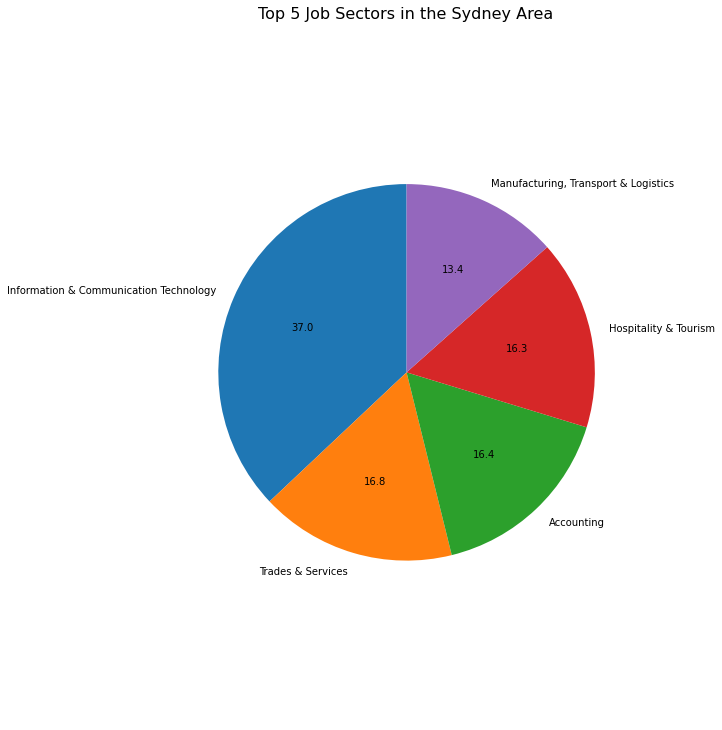

In [6]:
# plot a pie chart for the top 5 sectors in SYDNEY
sector_df_sydney_top5.index = sector_df_sydney_top5['Classification']
fig, ax = plt.subplots(figsize=(10,10)) 
plt.pie(sector_df_sydney_top5["Count"], labels=sector_df_sydney_top5["Classification"], autopct='%1.1f', startangle=90 )
plt.axis('equal')
plt.tight_layout()
plt.title('Top 5 Job Sectors in the Sydney Area',size=16,loc='center')
plt.ylabel('')
plt.show()

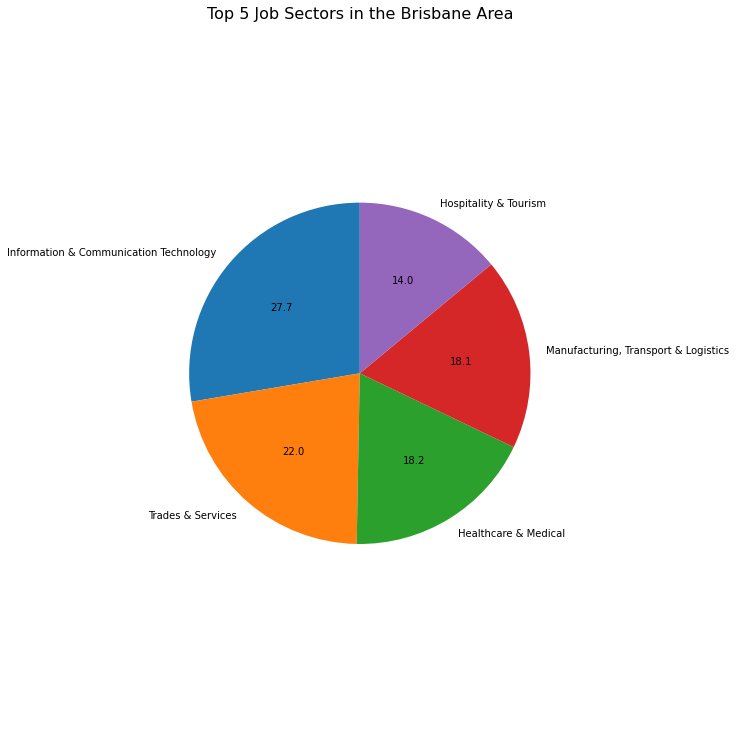

In [7]:
# plot a pie chart for the top 5 sectors in BRISBANE

sector_df_brisbane_top5.index = sector_df_brisbane_top5['Classification']
fig, ax = plt.subplots(figsize=(10,10)) 
plt.pie(sector_df_brisbane_top5["Count"], labels=sector_df_brisbane_top5["Classification"], autopct='%1.1f', startangle=90 )
plt.axis('equal')
plt.tight_layout()
plt.title('Top 5 Job Sectors in the Brisbane Area',size=16,loc='center')
plt.ylabel('')
plt.show()

In [8]:
# just make sure we have original data
df_sydney = df[df["Location"] == "Sydney" ]  
df_brisbane = df[df["Location"] == "Brisbane" ]
df_two_cities = df_sydney.append(df_brisbane, ignore_index = True) 

# then group by salary range and location
dfsalrange=df_two_cities
dfsalrange = dfsalrange.groupby(['Location', 'LowestSalary', 'HighestSalary']).size().reset_index(name='Number of Jobs')
print (dfsalrange)

    Location  LowestSalary  HighestSalary  Number of Jobs
0   Brisbane             0             30            2962
1   Brisbane            30             40            1192
2   Brisbane            40             50            2271
3   Brisbane            50             60            1481
4   Brisbane            60             70            1611
5   Brisbane            70             80            1384
6   Brisbane            80            100            1317
7   Brisbane           100            120            1494
8   Brisbane           120            150            1076
9   Brisbane           150            200            1202
10  Brisbane           200            250             548
11    Sydney             0             30            8427
12    Sydney            30             40            3035
13    Sydney            40             50            4406
14    Sydney            50             60            3751
15    Sydney            60             70            4152
16    Sydney  

In [9]:
# what are the top 5 companies advertising in sydney and their job sector?

df_sydney = df_sydney[df_sydney['Company'].isna()==False]
comp_df_sydney = df_sydney.groupby(['Company', 'Classification']).count()
comp_df_sydney['Classification'] = comp_df_sydney.index
comp_df_sydney['Count'] = comp_df_sydney["Id"]


comp_df_sydney = comp_df_sydney.sort_values(by=["Count"], ascending =False)
comp_df_sydney_top5 = comp_df_sydney[:5].copy()

print("Top 5 Companies in Sydney")
print(comp_df_sydney_top5['Id'])


Top 5 Companies in Sydney
Company                                  Classification                        
Jora Local                               Hospitality & Tourism                     1398
Design & Build                           Construction                               234
Paxus                                    Information & Communication Technology     231
Hays Accountancy & Finance               Accounting                                 229
Gough Property & Real Estate Recruiters  Real Estate & Property                     204
Name: Id, dtype: int64


In [10]:
# what are the top 5 companies advertising in brisbane and their job sector?
df_brisbane = df_brisbane[df_brisbane['Company'].isna()==False]
comp_df_brisbane = df_brisbane.groupby(['Company', 'Classification']).count()
comp_df_brisbane['Classification'] = comp_df_brisbane.index
comp_df_brisbane['Count'] = comp_df_brisbane["Id"]


comp_df_brisbane = comp_df_brisbane.sort_values(by=["Count"], ascending =False)
comp_df_brisbane_top5 = comp_df_brisbane[:5].copy()

print("Top 5 Companies in Brisbane")
print(comp_df_brisbane_top5['Id'])

Top 5 Companies in Brisbane
Company                       Classification                        
Jora Local                    Hospitality & Tourism                     235
The University of Queensland  Education & Training                      121
Paxus                         Information & Communication Technology    121
Hudson                        Information & Communication Technology    116
MW Recruitment                Accounting                                 92
Name: Id, dtype: int64


In [11]:
# just make sure we have original data
df_sydney = df[df["Location"] == "Sydney" ]  
df_brisbane = df[df["Location"] == "Brisbane" ]
df_two_cities = df_sydney.append(df_brisbane, ignore_index = True) 

# then group by salary range and location
dfsalrange=df_two_cities
dfsalrange = dfsalrange.groupby(['Location', 'LowestSalary', 'HighestSalary']).size().reset_index(name='Number of Jobs')
print (dfsalrange)

    Location  LowestSalary  HighestSalary  Number of Jobs
0   Brisbane             0             30            2962
1   Brisbane            30             40            1192
2   Brisbane            40             50            2271
3   Brisbane            50             60            1481
4   Brisbane            60             70            1611
5   Brisbane            70             80            1384
6   Brisbane            80            100            1317
7   Brisbane           100            120            1494
8   Brisbane           120            150            1076
9   Brisbane           150            200            1202
10  Brisbane           200            250             548
11    Sydney             0             30            8427
12    Sydney            30             40            3035
13    Sydney            40             50            4406
14    Sydney            50             60            3751
15    Sydney            60             70            4152
16    Sydney  

In [12]:
# Start section 1 Question 2. Analyse by time

# clean up date so no Txxx
df2 = df
df2["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df2["Date"] = pd.to_datetime(df["Date"])
# confirm column Date is now type datetime64
# df.dtypes


df2=df2.assign(Month= (df2["Date"].dt.strftime('%b')))
df2=df2.assign(DoW= (df2["Date"].dt.strftime('%a')))
df2=df2.assign(DoM= (df2["Date"].dt.strftime('%d')))

df2.dtypes
df2.head()




Id                                              Title  \
0  37404348                           Casual Stock Replenisher   
1  37404337                           Casual Stock Replenisher   
2  37404356  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3  37404330                              Team member - Belrose   
4  37404308  Business Banking Contact Centre Specialist, Ni...   

                                          Company       Date  \
0                                     Aldi Stores 2018-10-07   
1                                     Aldi Stores 2018-10-07   
2                             LB Creative Pty Ltd 2018-10-07   
3                          Anaconda Group Pty Ltd 2018-10-07   
4  Commonwealth Bank - Business & Private Banking 2018-10-07   

                  Location                         Area  \
0                   Sydney  North West & Hills District   
1    Richmond & Hawkesbury                          NaN   
2                 Brisbane          CBD & Inner Suburbs   
3  Gosford & Central Coast                          NaN   
4                   Sydney        Ryde & Macquarie Park   

                   Classification  SubClassification  \
0      Retail & Consumer Products  Retail Assistants   
1      Retail & Consumer Products  Retail Assistants   
2      Retail & Consumer Products  Retail Assistants   
3      Retail & Consumer Products  Retail Assistants   
4  Call Centre & Customer Service    Sales - Inbound   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   
2  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA             NaN   
3  Bring it on - do you love the great outdoors a...             NaN   
4  We are seeking highly articulate, enthusiastic...             NaN   

   LowestSalary  HighestSalary JobType Month  DoW DoM  
0             0             30     NaN   Oct  Sun  07  
1             0             30     NaN   Oct  Sun  07  
2             0             30     NaN   Oct  Sun  07  
3             0             30     NaN   Oct  Sun  07  
4             0             30     NaN   Oct  Sun  07

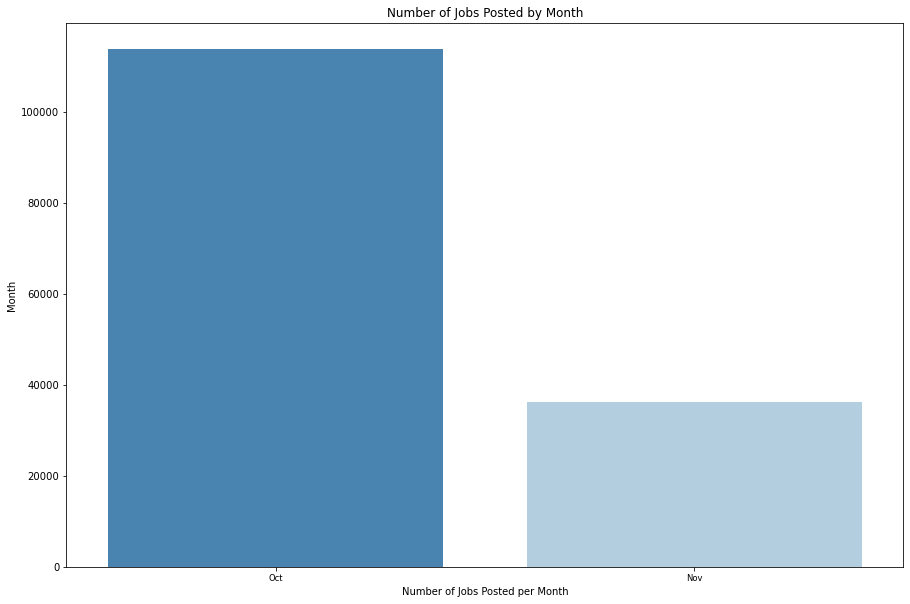

In [16]:
#create dataframe for Month counts
df_month = df2.groupby('Month').count()
df_month['Label'] = df_month.index
df_month['Count'] = df_month["Id"]

plt.figure(figsize=(15,10))
barChart = sns.barplot(x='Label', y='Count', palette="Blues_r", data=df_month, order=["Oct", "Nov"])
barChart.set_xticklabels(
    barChart.get_xticklabels(), 
    fontweight='light',
    fontsize='small'
)

plt.title('Number of Jobs Posted by Month')
plt.xlabel('Number of Jobs Posted per Month')
plt.ylabel('Month')
plt.show()



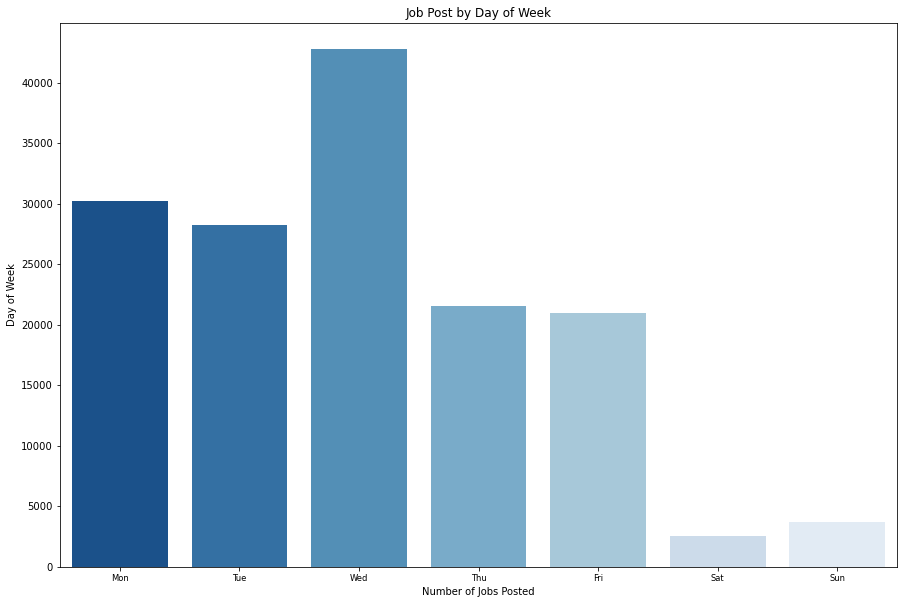

In [15]:
#create dataframe for Day of Week counts
df_week = df2.groupby('DoW').count()
df_week['Label'] = df_week.index
df_week['Count'] = df_week["Id"]

plt.figure(figsize=(15,10))
barChart = sns.barplot(x='Label', y='Count', palette="Blues_r", data=df_week, order=["Mon", "Tue", "Wed","Thu","Fri", "Sat", "Sun"])
barChart.set_xticklabels(
    barChart.get_xticklabels(), 
    fontweight='light',
    fontsize='small'
)

plt.title('Job Post by Day of Week')
plt.xlabel('Number of Jobs Posted')
plt.ylabel('Day of Week')
plt.show()

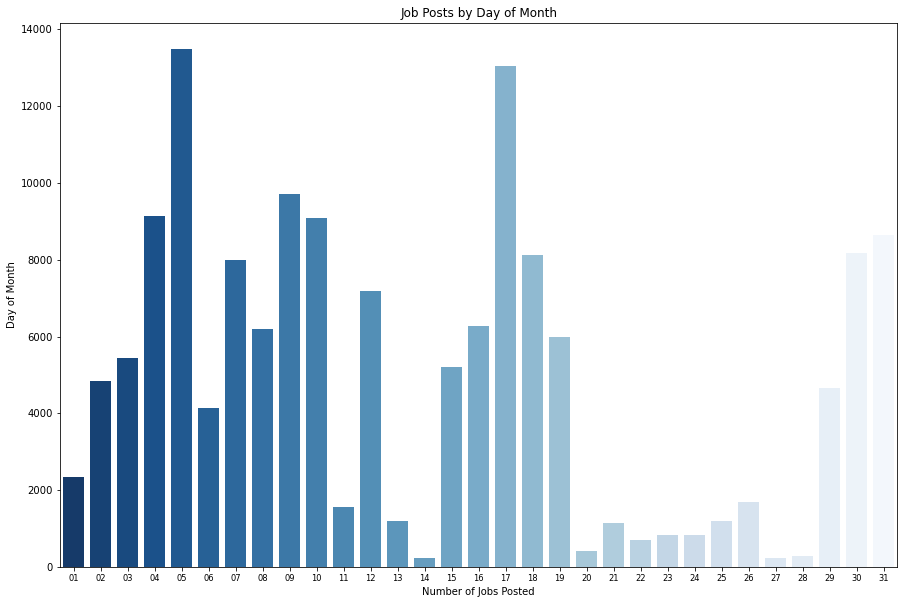

In [17]:
#create dataframe for Day of Month counts
df_dom = df2.groupby('DoM').count()
df_dom['Label'] = df_dom.index
df_dom['Count'] = df_dom["Id"]

plt.figure(figsize=(15,10))
barChart = sns.barplot(x='Label', y='Count', palette="Blues_r", data=df_dom)
barChart.set_xticklabels(
    barChart.get_xticklabels(), 
    fontweight='light',
    fontsize='small'
)

plt.title('Job Posts by Day of Month')
plt.xlabel('Number of Jobs Posted')
plt.ylabel('Day of Month')
plt.show()

In [18]:
# what are the top 5 cities advertising jobs? Grab them and use
df_top = df[df['Location'].isna()==False]
df_top = df_top.groupby(['Location']).count()
df_top['Location'] = df_top.index
df_top['Count'] = df_top["Id"]
df_top.head()

df_top = df_top.sort_values(by=["Count"], ascending =False)
df_top_top5 = df_top[:5].copy()

print(df_top_top5['Id'])

Location
Sydney       46357
Melbourne    35315
Brisbane     16538
Perth         9913
Adelaide      4998
Name: Id, dtype: int64


[Text(0, 0.5, 'Number of Job Posts'), Text(0.5, 0, 'Date')]

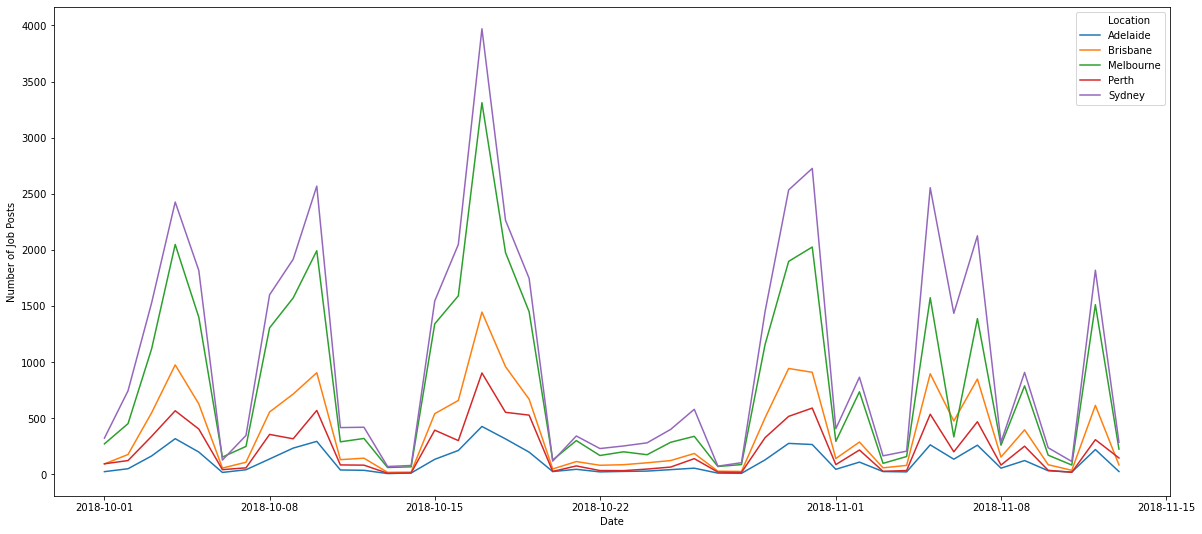

In [19]:
df_top = df2[df2['Location'].isna()==False]
df_top = df_top[df_top['Location'].isin(['Sydney','Melbourne', 'Brisbane','Perth','Adelaide'])]
df_top = df_top.groupby(['Location', 'Date']).count().reset_index()
#df_top.head(20)
plt.figure(figsize=(20,9))
ax = sns.lineplot(data = df_top, x='Date',y='Id', hue='Location')
ax.set(xlabel="Date", ylabel = "Number of Job Posts")


In [ ]:
df3 = df.groupby(['Date']).count().reset_index()
df3 = df3.assign(MA="0" )
df3.head()


In [20]:

df3 = df.groupby(['Date']).count().reset_index()


# Using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Date','Id'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['Id'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]
    
    moving_average_df['Date'] = moving_average_df['Date'].astype(int)
    return moving_average_df

df3.head()


Date    Id  Title  Company  Location  Area  Classification  \
0 2018-10-01  1023   1023     1004      1023   644            1023   
1 2018-10-02  1980   1980     1941      1980  1224            1980   
2 2018-10-03  4945   4945     4800      4945  2997            4945   
3 2018-10-04  8506   8506     8227      8506  5166            8506   
4 2018-10-05  5711   5711     5477      5711  3705            5711   

   SubClassification  Requirement  FullDescription  LowestSalary  \
0               1023         1023              994          1023   
1               1980         1980             1926          1980   
2               4945         4945             4844          4945   
3               8506         8506             8340          8506   
4               5711         5711             5631          5711   

   HighestSalary  JobType  
0           1023      994  
1           1980     1926  
2           4945     4844  
3           8506     8344  
4           5711     5640

In [34]:
# f, ax = plt.subplots(1, 1)

ma7_df = moving_average(df3, 7, 44)
ma30_df = moving_average(df3, 30, 44)

#df3 = df3.append(ma7_df, ignore_index = True) 
#df3 = df3.append(ma30_df, ignore_index = True) 
#df3['Date'] = df3['Date'].astype(str).map(len)

df3.head()

Date    Id  Title  Company  Location  Area  Classification  \
0 2018-10-01  1023   1023     1004      1023   644            1023   
1 2018-10-02  1980   1980     1941      1980  1224            1980   
2 2018-10-03  4945   4945     4800      4945  2997            4945   
3 2018-10-04  8506   8506     8227      8506  5166            8506   
4 2018-10-05  5711   5711     5477      5711  3705            5711   

   SubClassification  Requirement  FullDescription  LowestSalary  \
0               1023         1023              994          1023   
1               1980         1980             1926          1980   
2               4945         4945             4844          4945   
3               8506         8506             8340          8506   
4               5711         5711             5631          5711   

   HighestSalary  JobType  
0           1023      994  
1           1980     1926  
2           4945     4844  
3           8506     8344  
4           5711     5640

In [22]:
df3.dtypes

Date                 datetime64[ns]
Id                            int64
Title                         int64
Company                       int64
Location                      int64
Area                          int64
Classification                int64
SubClassification             int64
Requirement                   int64
FullDescription               int64
LowestSalary                  int64
HighestSalary                 int64
JobType                       int64
dtype: object

No handles with labels found to put in legend.


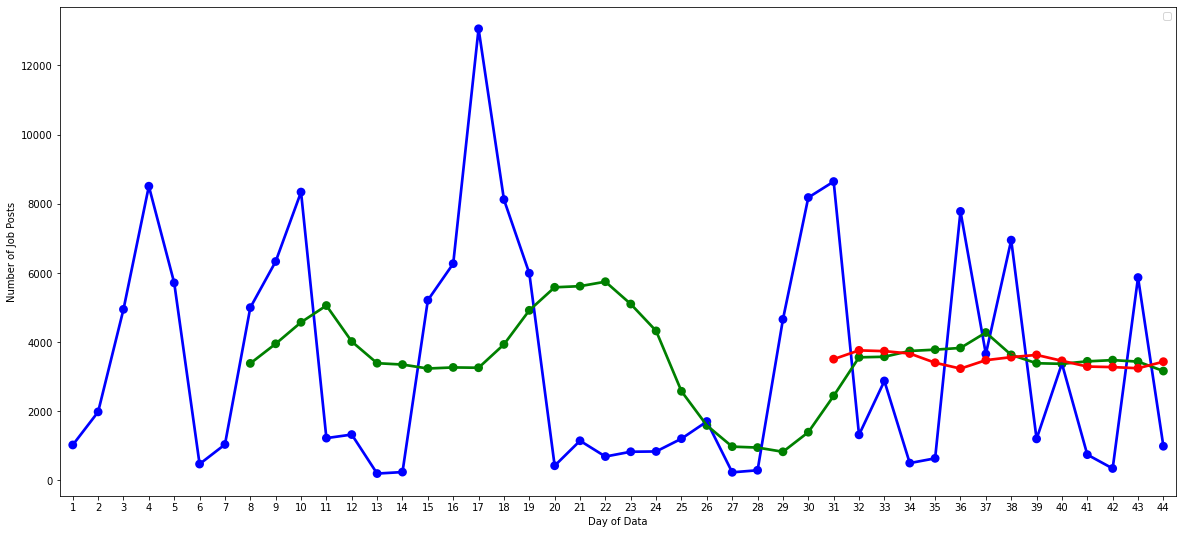

In [43]:
plt.figure(figsize=(20,9))

ma7_df = moving_average(df3, 7, 44)
ma30_df = moving_average(df3, 30, 44)
sns.pointplot(x='Date', y='Id', data=df3, label="Current", color='b')
sns.pointplot(x='Date', y='Id', data=ma7_df, marker='-',label='7 Day Moving Average', color='g')
sns.pointplot(x='Date', y='Id', data=ma30_df, marker = "--", label="30 Day Moving Average", color='r')

plt.xlabel("Day of Data")
plt.ylabel('Number of Job Posts')
plt.legend(loc='upper right')
#plt.legend( ['Current ', 'Orange', 'Green'], title='New legend')
# unable to get lineplot working in time.
#ax = sns.lineplot(data = df3, x='Date',y='Id', hue='MA')
#ax.legend(handles=ax.lines[::len(df)+1], labels=["Job Postings", "7 Day Moving Average", "30 Day Moving Average"])

plt.show()

In [6]:
df4 = df
df4 = df4[df4['Classification'] =="Information & Communication Technology"]
df4 = df4[df4['SubClassification'] =="Architects"]

from bs4 import BeautifulSoup

df4['FullDescription'] = df4['FullDescription'].astype(str)
df4['FullDescription'] = [BeautifulSoup(text).get_text() for text in df4['FullDescription'] ]
#df4.head()





In [7]:
# normalise our data in FullDescription

from __future__ import print_function, division
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords
import math
from collections import Counter
nltk.download('stopwords')
import pprint 
pp = pprint.PrettyPrinter(indent=4)

def normalize(document):
    # TODO: remove punctuation
    text = "".join([ch for ch in document if ch not in string.punctuation])
    
    # TODO: tokenize text
    tokens = nltk.word_tokenize(text)
    
    # TODO: Stemming
    stemmer = PorterStemmer()
    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    #ret = tokens
    return ret

original_documents = [x.strip() for x in df4['FullDescription']] 
documents = [normalize(d).split() for d in original_documents]
documents[0]



[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


['about',
 'the',
 'team',
 'capgemini',
 'deliv',
 'innov',
 'world',
 'class',
 'solut',
 'to',
 'our',
 'client',
 'as',
 'a',
 'global',
 'leader',
 'in',
 'thi',
 'field',
 'we',
 'have',
 'been',
 'deliv',
 'solut',
 'for',
 'over',
 '20',
 'year',
 'whether',
 'they',
 'are',
 'of',
 'a',
 'strateg',
 'oper',
 'or',
 'outsourc',
 'natur',
 'as',
 'we',
 'continu',
 'to',
 'grow',
 'were',
 'look',
 'for',
 'driven',
 'and',
 'innov',
 'solut',
 'architect',
 'to',
 'join',
 'our',
 'team',
 'about',
 'the',
 'role',
 'provid',
 'consult',
 'and',
 'architectur',
 'expertis',
 'to',
 'extern',
 'client',
 'you',
 'will',
 'work',
 'across',
 'deliveri',
 'assign',
 'of',
 'variou',
 'size',
 'and',
 'complex',
 'lead',
 'some',
 'of',
 'the',
 'best',
 'technic',
 'team',
 'in',
 'the',
 'busi',
 'you',
 'will',
 'ensur',
 'that',
 'we',
 'produc',
 'endtoend',
 'solut',
 'that',
 'are',
 'commerci',
 'sound',
 'and',
 'client',
 'focus',
 'most',
 'importantli',
 'about',
 'you'

In [8]:
# Flatten all the documents
flat_list = [word for doc in documents for word in doc]

# TODO: remove stop words from the vocabulary
words = [word for word in flat_list if word not in stopwords.words('english')]

# TODO: we take the 50 most common words only
counts = Counter(words)
vocabulary = counts.most_common(50)
newdf =([x for x in vocabulary ])
vocabulary = [x[0] for x in vocabulary]
assert len(vocabulary) == 50

#vocabulary.sort()
vocabulary[:50]

['experi',
 'solut',
 'architectur',
 'busi',
 'work',
 'develop',
 'design',
 'manag',
 'thi',
 'technolog',
 'role',
 'servic',
 'architect',
 'requir',
 'team',
 'data',
 'technic',
 'project',
 'skill',
 'applic',
 'provid',
 'client',
 'appli',
 'enterpris',
 'includ',
 'system',
 'pleas',
 'cloud',
 'opportun',
 'abil',
 'secur',
 'across',
 'environ',
 'inform',
 'integr',
 'lead',
 'support',
 'implement',
 'knowledg',
 '’',
 'strong',
 'understand',
 'process',
 'within',
 'commun',
 'demonstr',
 'custom',
 'infrastructur',
 'deliveri',
 'respons']

In [9]:
#newdf
newdf = pd.DataFrame(newdf, columns=["Word", "Count"])
newdf

Word  Count
0          experi   4301
1           solut   3990
2     architectur   3141
3            busi   2791
4            work   2367
5         develop   2332
6          design   2214
7           manag   2169
8             thi   2050
9       technolog   2013
10           role   1912
11         servic   1854
12      architect   1804
13         requir   1761
14           team   1754
15           data   1661
16        technic   1647
17        project   1644
18          skill   1613
19         applic   1428
20         provid   1377
21         client   1288
22          appli   1253
23      enterpris   1248
24         includ   1195
25         system   1163
26          pleas   1158
27          cloud   1118
28       opportun   1111
29           abil   1088
30          secur   1074
31         across   1008
32        environ    989
33         inform    981
34         integr    975
35           lead    966
36        support    954
37      implement    930
38       knowledg    910
39              ’    869
40         strong    868
41     understand    864
42        process    833
43         within    809
44         commun    807
45       demonstr    804
46         custom    798
47  infrastructur    796
48       deliveri    793
49        respons    777

In [10]:
# END - thank you!

In [11]:
newdf

Word  Count
0          experi   4301
1           solut   3990
2     architectur   3141
3            busi   2791
4            work   2367
5         develop   2332
6          design   2214
7           manag   2169
8             thi   2050
9       technolog   2013
10           role   1912
11         servic   1854
12      architect   1804
13         requir   1761
14           team   1754
15           data   1661
16        technic   1647
17        project   1644
18          skill   1613
19         applic   1428
20         provid   1377
21         client   1288
22          appli   1253
23      enterpris   1248
24         includ   1195
25         system   1163
26          pleas   1158
27          cloud   1118
28       opportun   1111
29           abil   1088
30          secur   1074
31         across   1008
32        environ    989
33         inform    981
34         integr    975
35           lead    966
36        support    954
37      implement    930
38       knowledg    910
39              ’    869
40         strong    868
41     understand    864
42        process    833
43         within    809
44         commun    807
45       demonstr    804
46         custom    798
47  infrastructur    796
48       deliveri    793
49        respons    777

In [12]:
# Griffith University changes to cour4ses recommendations ICT and healthcare

sector_df = df[df['Classification'].isna()==False]
sector_df = sector_df.groupby('Classification').count()
sector_df['Classification'] = sector_df.index
sector_df['Count'] = sector_df["Id"]


sector_df = sector_df.sort_values(by=["Count"], ascending =False)
sector_df5 = sector_df[:5].copy()

print("Top 5 Job Sectors in Australia")
print(sector_df5['Id'])

Top 5 Job Sectors in Australia
Classification
Information & Communication Technology    16661
Trades & Services                         14125
Healthcare & Medical                      12515
Hospitality & Tourism                     11818
Manufacturing, Transport & Logistics       9608
Name: Id, dtype: int64


In [13]:
# create df of jus ict and healthcare
sector_dfwords = df[df['Classification'].isna()==False]
sector_dfwords = sector_dfwords[sector_dfwords['Classification'].isin(['Information & Communication Technology','Healthcare & Medical'])]

#strip description of HTML
sector_dfwords['FullDescription'] = sector_dfwords['FullDescription'].astype(str)
sector_dfwords['FullDescription'] = [BeautifulSoup(text).get_text() for text in sector_dfwords['FullDescription'] ]

#normalise data
original_documents = [x.strip() for x in sector_dfwords['FullDescription']] 
documents = [normalize(d).split() for d in original_documents]
documents[0]

#Split into pairs of popular words
# Flatten all the documents
flat_list = [word for doc in documents for word in doc]

# TODO: remove stop words from the vocabulary
words = [word for word in flat_list if word not in stopwords.words('english')]

# TODO: we take the 50 most common words only
counts = Counter(words)
vocabulary = counts.most_common(50)
new_sector_dfwords =([x for x in vocabulary ])
new_sector_dfwords = pd.DataFrame(new_sector_dfwords, columns=["Word", "Count"])
new_sector_dfwords

Word  Count
0       experi  81317
1         work  81033
2        manag  59265
3         team  56321
4       servic  52478
5          thi  52056
6      develop  50913
7         role  48126
8        skill  45060
9       provid  42420
10        busi  40120
11     support  39315
12        care  35820
13      applic  35024
14      requir  34758
15    opportun  33926
16       appli  32388
17      health  32386
18     project  31657
19      commun  30762
20      includ  29072
21       pleas  28458
22           ’  25745
23       posit  25494
24      client  24545
25        abil  24064
26     environ  22508
27      within  20852
28      system  20797
29       solut  20687
30   technolog  20581
31      custom  20303
32      strong  19101
33     respons  18185
34     success  18145
35        data  17699
36       excel  17671
37      inform  17636
38         new  17504
39       peopl  17431
40    knowledg  17169
41      clinic  17108
42      design  17087
43        lead  17047
44     practic  16953
45  profession  16861
46     current  16800
47     organis  16691
48      across  16587
49     technic  16560

In [15]:
counts


Counter({'nan': 690,
         'compani': 13495,
         'thi': 52056,
         'organis': 16691,
         'wellestablish': 444,
         'vast': 139,
         'market': 6690,
         'presenc': 443,
         'proud': 1064,
         'histori': 1685,
         'deliv': 15055,
         'cut': 594,
         'edg': 887,
         'solut': 20687,
         'strongli': 604,
         'commit': 10050,
         'custom': 20303,
         'need': 15400,
         'busi': 40120,
         'genuin': 1482,
         'forefront': 440,
         'field': 2754,
         'role': 48126,
         'come': 2167,
         'senior': 8003,
         'within': 20852,
         'team': 56321,
         'respons': 18185,
         'main': 910,
         'account': 4649,
         'see': 2705,
         'focu': 5301,
         'bau': 457,
         'also': 8764,
         'requir': 34758,
         'touch': 989,
         'project': 31657,
         'work': 81033,
         'base': 14793,
         'plan': 11527,
         'technolog':